In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# assigning file path.
path='./Data/automobile_data.csv'

In [3]:
# Read csv file
auto_df=pd.read_csv(path)

In [4]:
# Deleting unwanted column
del auto_df['Unnamed: 0']

In [5]:
# Preview dataframe
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Multivariate Visualization:
Create a pairplot using Seaborn to visualize the relationship and distribution amoung three numerical variables in the data set.
Customize the pairplot to include histograms,KDE plots and regression lines.

c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


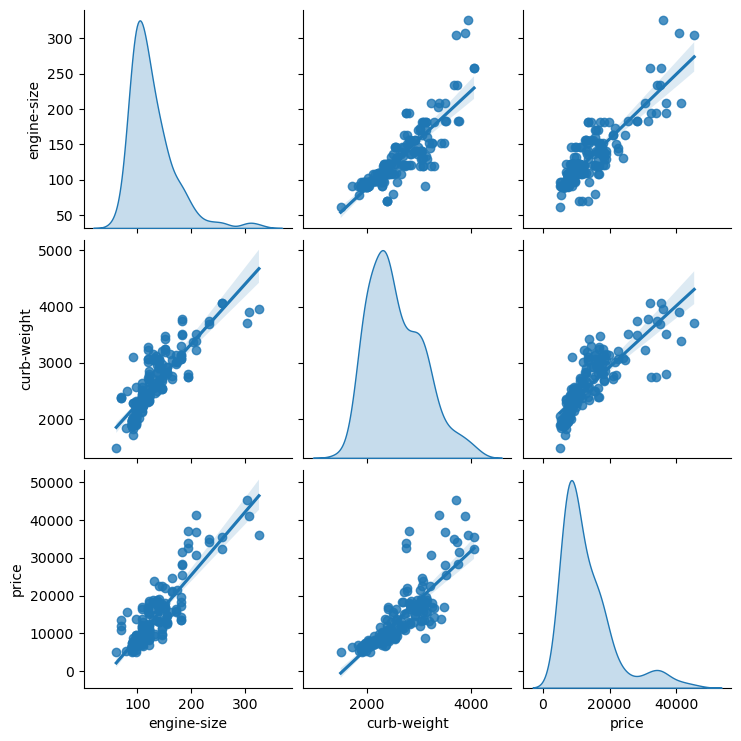

In [6]:
# Create the pairplot
pairplot = sns.pairplot(
    auto_df[['engine-size', 'curb-weight', 'price']], 
    diag_kind='kde', 
    kind='reg',       
    markers='o'       
)


### Advanced Correlation Analysis:
Compute spearman rank correlation coefficient for all numerical columns in the dataset.Create a heatmap to visualize the spearmans correlation matrix and compare it with pearson correlation matrix.

In [7]:
# Filtering the numerical columns from the auto_df dataframe.
numerical_df=auto_df.select_dtypes(include=[np.number])
numerical_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
# finding the spearman rank correlation and pearson correlation
spear_corr=numerical_df.corr(method='spearman')
pear_corr=numerical_df.corr(method='pearson')

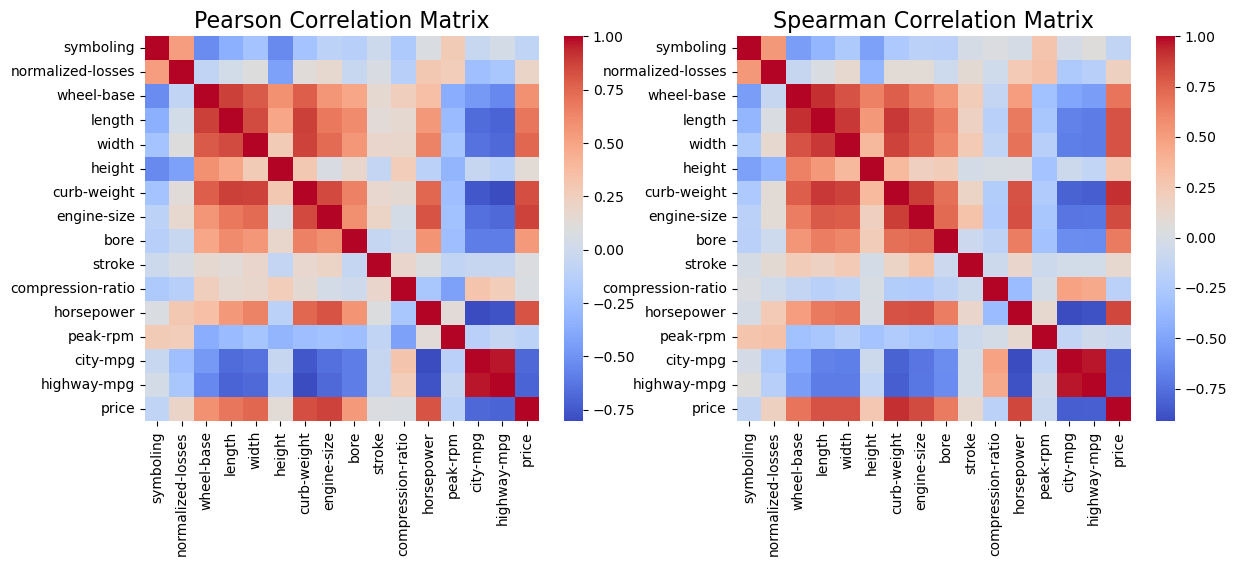

In [9]:
# Heatmap for pearson correlation and spearman correlation
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.heatmap(pear_corr,cmap='coolwarm',ax=ax[0])
sns.heatmap(spear_corr,cmap='coolwarm',ax=ax[1])
ax[0].set_title('Pearson Correlation Matrix', size=16)
ax[1].set_title('Spearman Correlation Matrix', size=16)
plt.show()

### Hypothesis testing - Two variables:
Perform a two sample t-test to determine if there is a significant difference in the means of two numerical variables across different categories.Report the p-value and interpret the result.

In [10]:
# filtering the categorical columns
cat_df=auto_df.select_dtypes(include=['object','category'])
cat_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [11]:
# choosing the numerical variable as fuel-type
cat_df['fuel-type'].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [12]:
# choosing numerical variables as price and engine-size.Creating a subset as ttest_df.
ttest_df=auto_df[['fuel-type','engine-size','price']]

In [13]:
# Spliting the subset into two categorical groups.
gas_df=ttest_df[ttest_df['fuel-type']=='gas'].dropna()
diesel_df=ttest_df[ttest_df['fuel-type']=='diesel'].dropna()

In [14]:
# Performing t-test.
t_stat_engine_size, p_value_engine_size = st.ttest_ind(gas_df['engine-size'], diesel_df['engine-size'])
t_stat_price, p_value_price = st.ttest_ind(gas_df['price'], diesel_df['price'])


In [15]:
# Reporting the result.
print(f"Engine Size T-Statistic: {t_stat_engine_size}, P-Value: {p_value_engine_size}")
print(f"Price T-Statistic: {t_stat_price}, P-Value: {p_value_price}")

Engine Size T-Statistic: -1.0009722101525218, P-Value: 0.3180558273357412
Price T-Statistic: -1.5658926002375724, P-Value: 0.1189625443809135


In [16]:
# Interpretting the p-value.
alpha = 0.05
if p_value_engine_size < alpha:
    print("There is a significant difference in engine size means between fuel types.")
else:
    print("There is no significant difference in engine size means between fuel types.")

if p_value_price < alpha:
    print("There is a significant difference in price means between fuel types.")
else:
    print("There is no significant difference in price means between fuel types.")

There is no significant difference in engine size means between fuel types.
There is no significant difference in price means between fuel types.


### Time series decomposition:
For a time series dataset,decompose the time series into trend,sesonal and residual components.Use sesonal_decompose from stats models and visualize each component using matplotlib.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.Series(np.random.randn(100).cumsum() + 10 * np.sin(np.linspace(0, 2 * np.pi, 100)), index=dates)

# Decompose the time series
decomposition = seasonal_decompose(data, model='additive')

In [18]:
# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


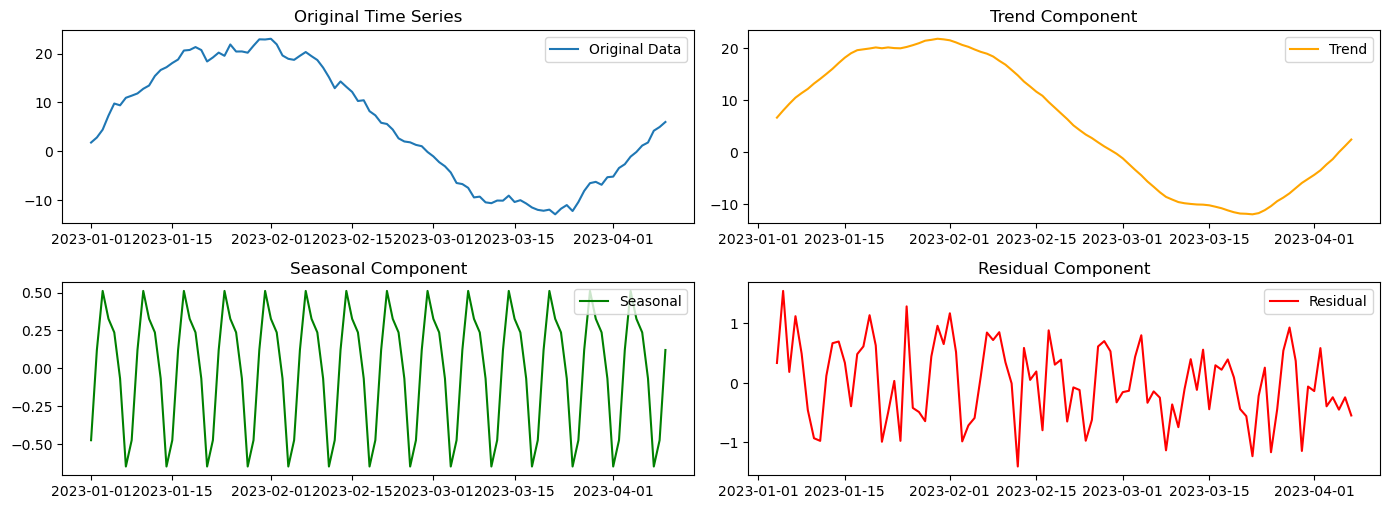

In [19]:
# Plot the components using matplotlib.
plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.plot(data, label='Original Data')
plt.title('Original Time Series')
plt.legend(loc='upper right')

plt.subplot(4, 2, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper right')

plt.subplot(4, 2, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper right')

plt.subplot(4, 2, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Multivariate Hypothesis testing:
Perform a MANOVA to test if there are significant difference in the means of multiplle dependent variables across different groups.Use pingouin to conduct the analysis and interpret the result.

In [20]:
import pingouin as pg
auto_df['fuel-type']=auto_df['fuel-type'].astype('category')
auto_df=auto_df.dropna()

In [21]:
anova_engine_size = pg.anova(data=auto_df, dv='engine-size', between='fuel-type')
anova_horse_power = pg.anova(data=auto_df, dv='horsepower', between='fuel-type')
anova_price = pg.anova(data=auto_df, dv='price', between='fuel-type')

print("ANOVA for Engine Size:\n", anova_engine_size)
print("\nANOVA for Horse Power:\n", anova_horse_power)
print("\nANOVA for Price:\n", anova_price)

ANOVA for Engine Size:
       Source  ddof1  ddof2         F     p-unc       np2
0  fuel-type      1    157  5.901371  0.016258  0.036227

ANOVA for Horse Power:
       Source  ddof1  ddof2         F     p-unc       np2
0  fuel-type      1    157  1.591035  0.209049  0.010032

ANOVA for Price:
       Source  ddof1  ddof2          F     p-unc      np2
0  fuel-type      1    157  11.505645  0.000878  0.06828


### Summary:
From the above analysis,the key findings are as follows:
* Engine Size: Significant difference with a small effect size (3.6%).

* Horse Power: No significant difference with a very small effect size (1% ).

* Price: Significant difference with a moderate effect size (6.8%).

### Complex pattern Identification:
Applay PCA to reduce dimensionality of a high dimensional dataset. Visualize first two principle components using a scatter plot and interpret the variance explained by each component.

In [26]:
# Converting categoical values to integers.
encoded_auto_df=pd.get_dummies(auto_df,dtype=int)

In [31]:
# creating PCA.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca=PCA(n_components=2)
auto_pca=pca.fit_transform(encoded_auto_df)
pca_df=pd.DataFrame(auto_pca,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,2482.932198,460.136129
1,6008.964271,475.558871
2,6269.700455,478.691128
3,12435.278167,592.178334
4,4956.156813,808.574635
...,...,...
154,5416.344362,342.728849
155,7618.851811,283.224641
156,10046.618830,543.713000
157,11053.228898,-154.224724


In [37]:
# creating the model with KMeans and finding the best value for k.
inertia=[]
k=list(range(1,11))
for i in k:
    model=KMeans(n_clusters=i,random_state=1)
    model.fit_transform(pca_df)
    inertia.append(model.inertia_)

c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [39]:
# creating inertia df.
inertia_df={"k":k,"inertia":inertia}
inertia_df=pd.DataFrame(inertia_df)
inertia_df.head()

,k,inertia
0,1,5.523173e+09
1,2,1.548617e+09
2,3,7.489176e+08
3,4,4.427281e+08
4,5,2.983627e+08


In [49]:
# Visualize first two principle components using a scatter plot
import hvplot.pandas
inertia_df.hvplot.line(x="k",
                       y="inertia")

:Curve   [k]   (inertia)

In [50]:
model=KMeans(n_clusters=2,random_state=1)
model.fit(pca_df)
result=model.predict(pca_df)
pca_copy=pca_df.copy()
pca_copy['labels']=result
pca_copy.head()

c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA1,PCA2,labels
0,2482.932198,460.136129,0
1,6008.964271,475.558871,1
2,6269.700455,478.691128,1
3,12435.278167,592.178334,1
4,4956.156813,808.574635,1


In [92]:
pca_copy.hvplot.scatter(x='PCA1',
                        y='PCA2',
                        by='labels')

:NdOverlay   [labels]
   :Scatter   [PCA1]   (PCA2)

In [52]:
# finding variance
variance=pca.explained_variance_
explained_variance = np.array(variance)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

print(explained_variance_ratio)

[0.99387903 0.00612097]


### Conclusion:
From the explained variance,the key findings are:

* The first principal component explains approximately 99.39% of the total variance in the data.

* The second principal component explains about 0.61% of the total variance.

### Hypothesis testing - Paired variables:
Perform a paired t-test to compare the means of two related numerical variables before and after of an intervension.Visualize the distribution of differences using a violin plot and report the test statistics. 

In [56]:
# Data preperation.
before=np.random.randint(1, 151, size=50)
after=np.random.randint(200, 300, size=50)


In [59]:
data={"Before":before,"After":after}
data_df=pd.DataFrame(data)

In [60]:
t_static,p_value=st.ttest_rel(data_df['Before'],data_df['After'])
print(f"T-Statistics={t_static}")
print(f"P-Value={p_value}")

T-Statistics=-26.754808532996396
P-Value=6.776864064177126e-31


In [61]:
data_df['Difference']=data_df['After']-data_df['Before']

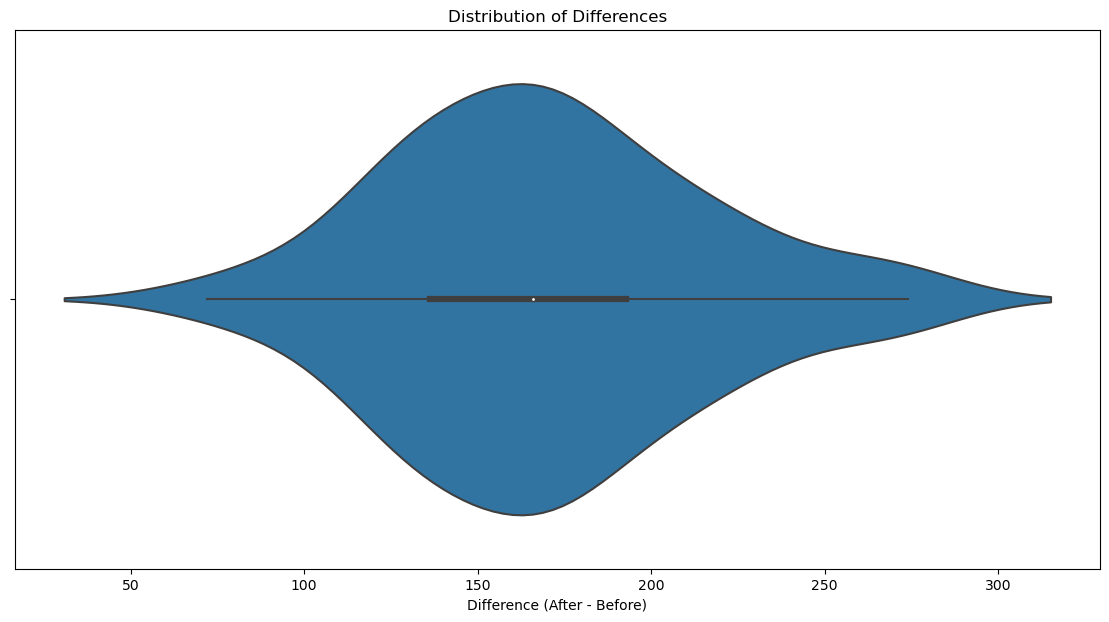

In [65]:
plt.figure(figsize=(14,7))
sns.violinplot(x=data_df['Difference'])
plt.title('Distribution of Differences')
plt.xlabel('Difference (After - Before)')
plt.show()

### Conclusion:
* Here the t-statistics value is -26.754808532996396 that is the absolute value is high this indicates that the intervention has a very strong impact. 
* Also the p-value is less than 0.05 (p-value=6.776864064177126e-31) indicates it we can reject the null hypothesis,that is the difference between the means is statistically significant.


### Advanced regression analysis:
Fit a multiple linear regression model using stats models to predict a target variable based on several predictors.Evaluate the model's performance using adjusted R-squared and residual plots.

In [ ]:
# Define target and predictor variables.
data = auto_df.dropna(subset=['engine-size', 'curb-weight', 'price'])
X=data[['engine-size','curb-weight']]
y=data['price']

In [ ]:
# Ensure X and y have matching indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['engine-size', 'curb-weight'])
X_scaled = sm.add_constant(X_scaled)


In [ ]:
# Fit the model
model = sm.OLS(y, X_scaled).fit()

In [ ]:
# Evaluate model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     378.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.48e-68
Time:                        11:48:52   Log-Likelihood:                -1931.8
No. Observations:                 201   AIC:                             3870.
Df Residuals:                     198   BIC:                             3879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.321e+04    256.654     51.459      

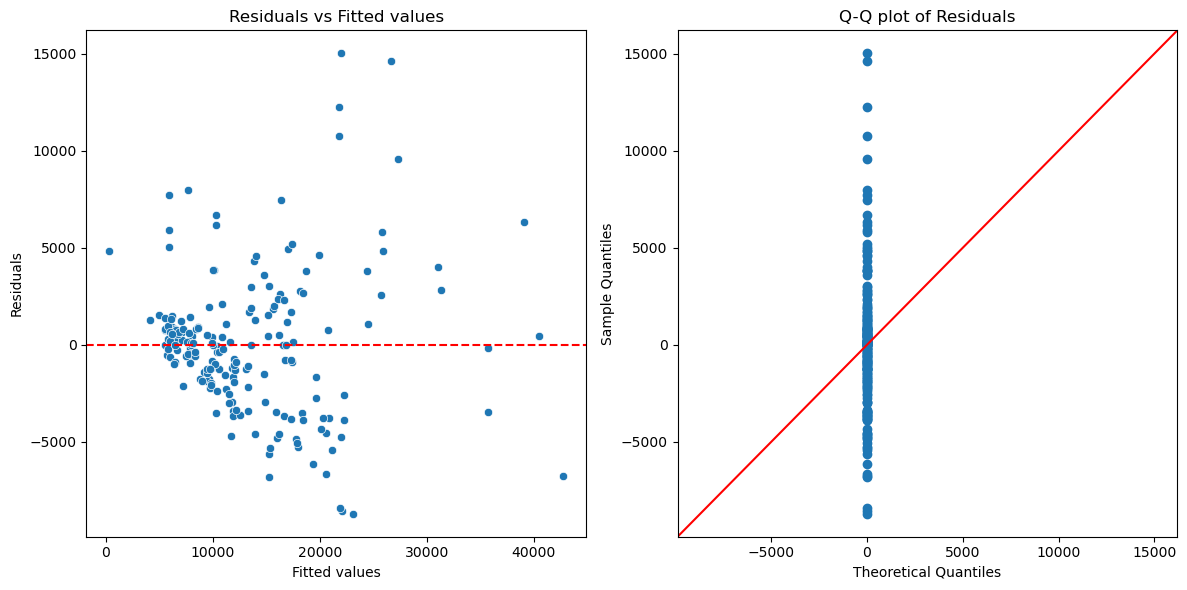

In [ ]:
# Predict values
y_pred = model.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))

# Residuals vs Fitted values plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')

# Q-Q plot to check normality of residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', ax=plt.gca())
plt.title('Q-Q plot of Residuals')

plt.tight_layout()
plt.show()


### Cluster analysis and visualization:
Applay KMeans clustering to group the data into clusters based on multiple numerical features.Visualize the clusters using scatter plot with cluster cetroids and interpret the cluster characteristics.

In [77]:
model=KMeans(n_clusters=3,random_state=1)
model.fit(encoded_auto_df)
result=model.predict(encoded_auto_df)
encoded_auto_df_copy=encoded_auto_df.copy()
encoded_auto_df_copy['labels']=result
encoded_auto_df_copy.head()

c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,labels
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,...,1,0,0,0,0,0,0,1,0,1
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,1
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,1
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,...,0,0,0,0,0,0,0,1,0,2
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,...,1,0,0,0,0,0,0,1,0,1


In [78]:
centroids = model.cluster_centers_

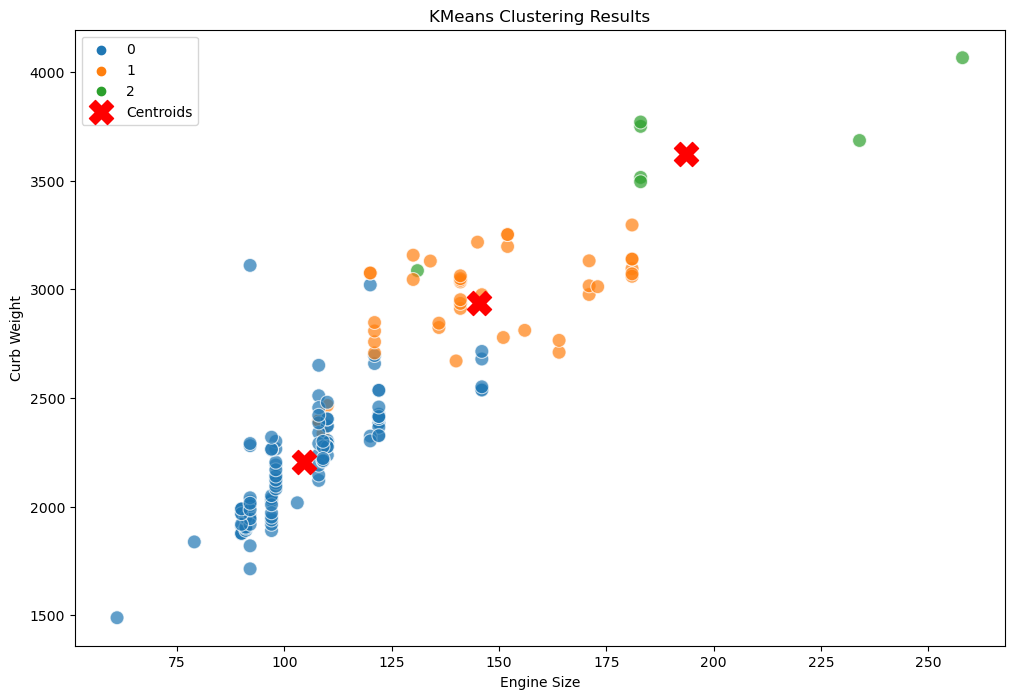

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=encoded_auto_df_copy['engine-size'], y=encoded_auto_df_copy['curb-weight'],
                hue=encoded_auto_df_copy['labels'], palette='tab10', s=100, alpha=0.7)

plt.scatter(centroids[:, encoded_auto_df.columns.get_loc('engine-size')],
            centroids[:, encoded_auto_df.columns.get_loc('curb-weight')],
            c='red', s=300, marker='X', label='Centroids')

plt.title('KMeans Clustering Results')
plt.xlabel('Engine Size')
plt.ylabel('Curb Weight')
plt.legend()
plt.show()

### Cluster interpretation:
From the above figure we can see that there are 3 different clusters.From the position of the centroids of each cluster we can interpret the result as follows:
* cluster0 (Blue):Indicates vehicles with low engine sizes and low curb weights.

* cluster1 (Orange): Vehicles with moderate engine sizes and moderate curb weights.

* cluster2 (Green): Vehicles with high engine sizes and high curb weights.

### Anomaly Detection:
Implement an anomaly detection algorithm using Isolation Forest method from scikit-learn.Visualize the anomalies detected in a scatter plot and analyse their distribution within the dataset.

In [97]:
# import dependencies
from sklearn.ensemble import IsolationForest
# create data.
anomaly_df=auto_df[['engine-size','curb-weight']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
anomaly_df['anomaly'] = iso_forest.fit_predict(anomaly_df[['engine-size','curb-weight']])

# Convert anomaly labels from -1/1 to boolean
anomaly_df['anomaly'] = anomaly_df['anomaly'] == -1

print(anomaly_df)


     engine-size  curb-weight  anomaly
3            109         2337    False
4            136         2824    False
6            136         2844    False
8            131         3086    False
10           108         2395    False
..           ...          ...      ...
200          141         2952    False
201          141         3049    False
202          173         3012    False
203          145         3217     True
204          141         3062    False

[159 rows x 3 columns]


C:\Users\karun\AppData\Local\Temp\ipykernel_9940\135061285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['anomaly'] = iso_forest.fit_predict(anomaly_df[['engine-size','curb-weight']])
C:\Users\karun\AppData\Local\Temp\ipykernel_9940\135061285.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['anomaly'] = anomaly_df['anomaly'] == -1


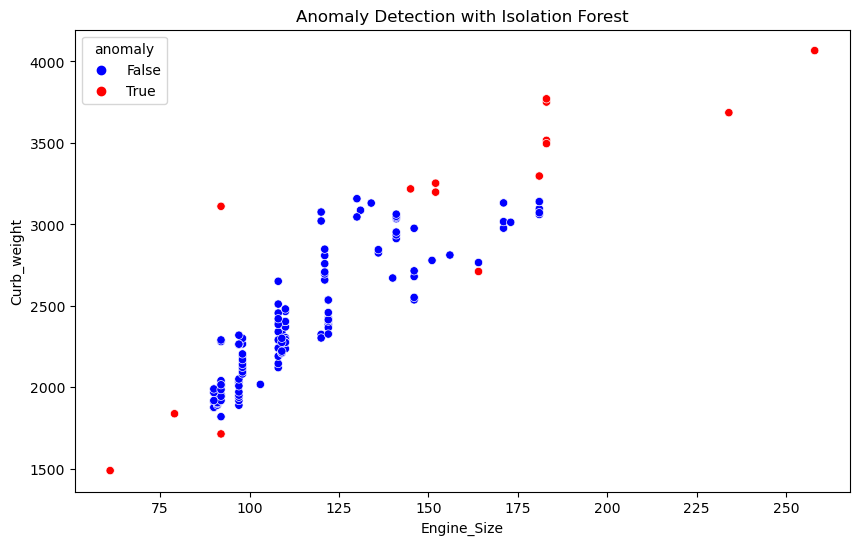

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='curb-weight', hue='anomaly', data=anomaly_df, palette={False: 'blue', True: 'red'}, legend=True)
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Engine_Size')
plt.ylabel('Curb_weight')
plt.show()


In [99]:
# Count the number of anomalies
num_anomalies = anomaly_df['anomaly'].sum()
print(f'Number of anomalies detected: {num_anomalies}')


Number of anomalies detected: 16


c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karun\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

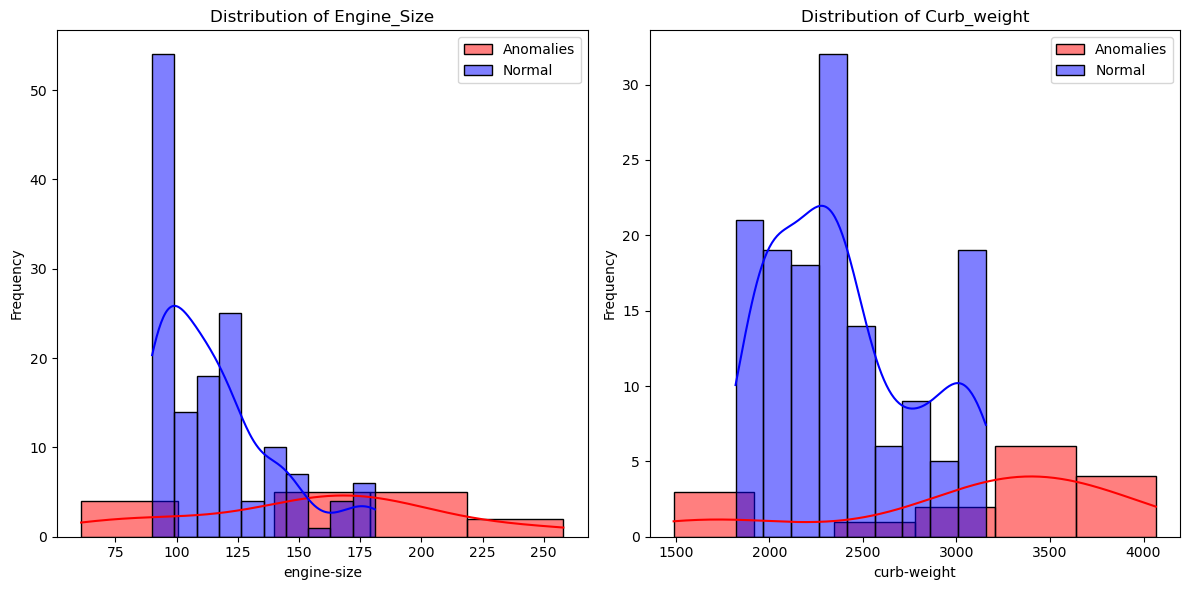

In [100]:
# Visualize distribution of features for anomalies and normal points
plt.figure(figsize=(12, 6))

# Plot histogram for Engine_Size
plt.subplot(1, 2, 1)
sns.histplot(anomaly_df[anomaly_df['anomaly']]['engine-size'], color='red', label='Anomalies', kde=True)
sns.histplot(anomaly_df[~anomaly_df['anomaly']]['engine-size'], color='blue', label='Normal', kde=True)
plt.title('Distribution of Engine_Size')
plt.xlabel('engine-size')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram for Curb_weight
plt.subplot(1, 2, 2)
sns.histplot(anomaly_df[anomaly_df['anomaly']]['curb-weight'], color='red', label='Anomalies', kde=True)
sns.histplot(anomaly_df[~anomaly_df['anomaly']]['curb-weight'], color='blue', label='Normal', kde=True)
plt.title('Distribution of Curb_weight')
plt.xlabel('curb-weight')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
